# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
x_test.shape

(10000, 28, 28)

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

Text(0.5, 1.0, '9')

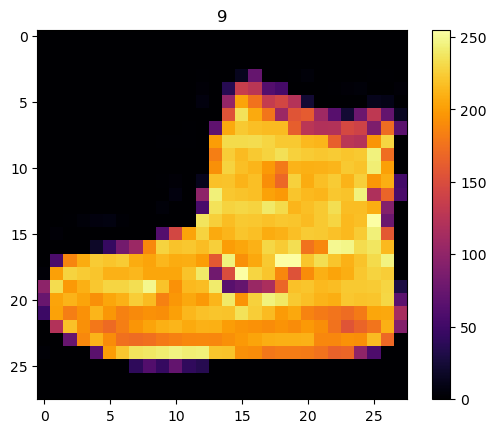

In [3]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[0], cmap='inferno')
plt.colorbar()
plt.title(y_train[0])

## Предобработка

**Нормализуйте данные X_train и X_test **

In [4]:
import numpy as np

x_train = (np.expand_dims(x_train, axis=-1)/255).astype(np.float32)
y_train = y_train.astype(np.int64)

x_test = (np.expand_dims(x_test, axis=-1)).astype(np.float32)
y_test = y_test.astype(np.int64)

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [6]:
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


**Преобразуйте  y_train и y_test в one_hot представления **

In [7]:
y_train = np.eye(y_train.max() + 1)[y_train]

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
y_test = np.eye(y_test.max() + 1)[y_test]

In [10]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x_train.shape

(60000, 28, 28, 1)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [12]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = Sequential()

conv_layer = Conv2D(filters=32, kernel_size=(4, 4), activation='relu')
max_pooling_layer = MaxPooling2D(pool_size=(2, 2))
flatten_layer = Flatten()
input_dense = Dense(units=128,activation='relu')
output_dense = Dense(units=10,activation='softmax')


model.add(conv_layer)
model.add(max_pooling_layer)
model.add(flatten_layer)
model.add(input_dense)
model.add(output_dense)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [13]:
model.fit(x_train,y_train,epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4183 - accuracy: 0.8517
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2806 - accuracy: 0.8980
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2389 - accuracy: 0.9135
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2100 - accuracy: 0.9231
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1881 - accuracy: 0.9317
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1698 - accuracy: 0.9388
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1554 - accuracy: 0.9440
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1392 - accuracy: 0.9502
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1278 - accuracy: 0.9551
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [19]:
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import classification_report

In [20]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [30]:
true_classes = np.argmax(y_test,axis=1)
pred_classes = np.argmax(y_pred,axis=1)

In [34]:
print(classification_report(true_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.91      0.68      0.78      1000
           3       0.94      0.82      0.88      1000
           4       0.71      0.92      0.80      1000
           5       0.96      0.98      0.97      1000
           6       0.61      0.72      0.66      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



## Проверим на случайном наблюдении

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

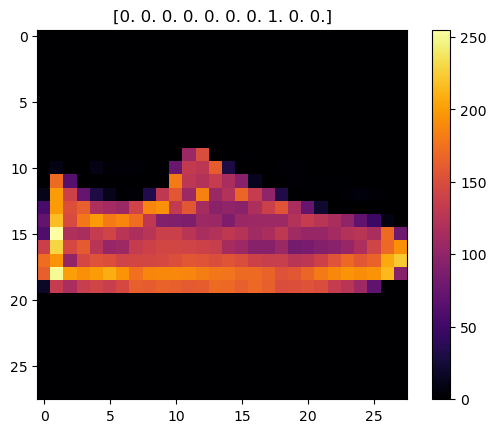

In [39]:
plt.imshow(x_test[12], cmap='inferno')
plt.colorbar()
plt.title(y_test[12])

**Результаты показали, что полученное значение принадлежит седьмой категории - кроссовкам, что отражаем действительность**